In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# iris 데이터 준비
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names) 
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
X = iris.data[:100, :2]
y = iris.target[:100]

df1 = pd.DataFrame(X, columns=iris.feature_names[:2])
df1

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
95,5.7,3.0
96,5.7,2.9
97,6.2,2.9
98,5.1,2.5


In [3]:
df2 = pd.DataFrame(y, columns=['species'])
df2

,species
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


# Hard Margin SVM

REPORT1: Draw a decision boundary that perfectly separates the two datasets. Implement the process of finding the optimal decision boundary using hinge loss and coordinate gradient descent(What you learned in the lesson!). The report should include a reasoned explanation of how the decision boundary was drawn. The size of the margin does not necessarily have to be the maximum, and will only be evaluated for complete separation of the data relative to the decision boundary.

Weight (w) : [ 10.48572773 -11.19087063] Bias (b) : 22.376099999994462
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1] 
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
SVM classification accuracy 1.0


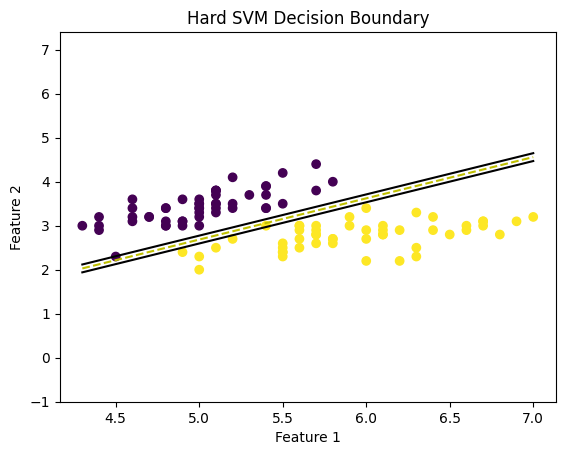

In [1]:
### Hard Margin SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets


class SVM:

    # 하이퍼파라미터의 경우 10^-4 의 경우가 가장 효과적이었다. 
    def __init__(self, learning_rate=0.0001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1) # y의 값을 1 or -1로 변환

        # init weights
        #self.w = np.zeros(n_features)
        #self.b = 0
        # w=0, b=0으로 하면 0.99 정확도가 나온다. 
        
        self.w = np.array([float(25.3), float(-5.2)]) # local minimum을 피하기 위해 초기값을 다르게 설정
        self.b = 20

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        print("Weight (w) :", self.w, "Bias (b) :" , self.b) # 학습된 w, b, 예측값을 출력
        return np.sign(approx)



if __name__ == "__main__":
 
    # 아이리스 데이터 준비
    iris = datasets.load_iris()
    X = iris.data[:100, :2]
    y = iris.target[:100]  

    # 데이터에서 y의 값을 1 or -1로 변환
    y = np.where(y == 1, 1, -1)

    model = SVM()
    model.fit(X, y)
    predictions = model.predict(X)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


def visualize_ssvm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
    x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, model.w, model.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, model.w, model.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, model.w, model.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, model.w, model.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Hard SVM Decision Boundary')
    plt.show()

print(y, "\n" ,predictions)
print("SVM classification accuracy", accuracy(y, predictions))
visualize_ssvm()

w :  [ 10.48572773 -11.19087063] b :  22.376099999994462
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1] 
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
HardMaringSVM classification accuracy 1.0


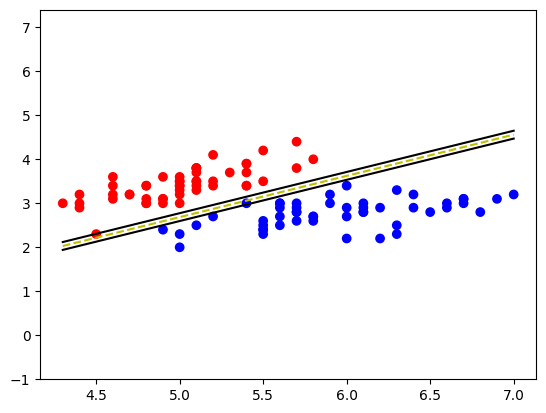

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets


class HardMaringSVM:

    # 하이퍼파라미터의 경우 10^-4 의 경우가 가장 효과적이었다. 
    def __init__(self, learning_rate=0.0001, lambda_param=0.02, iteration=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.iteration = iteration
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y = np.where(y <= 0, -1, 1) # y의 값을 1 or -1로 변환

        # 가중치와 바이어스 초기화
        # local minimum을 피하기 위해 초기값을 다르게 설정
        self.w = np.array([float(25.3), float(-5.2)]) 
        self.b = 20

        #self.w = np.zeros(n_features)
        #self.b = 0
        # 보통은 w=0, b=0으로 하는데 이 경우는 0.99 정확도가 나온다. 

        while self.iteration > 0:
            for idx in range(len(X)):
                x_i = X[idx]
                
                if y[idx] * (np.dot(x_i, self.w) - self.b) > 1:
                    self.w -= self.lr * (self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]
            
            self.iteration -= 1


    def predict(self, X):
        return np.sign(np.dot(X, self.w) - self.b) 
    
    def weight_result(self, X):
        print("w : ", self.w, "b : ", self.b) # 학습된 w, b, 예측값을 출력
    


def visualization():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", color=np.where(y == -1, 'red', 'blue'))

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
    x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, model.w, model.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, model.w, model.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, model.w, model.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, model.w, model.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()


def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]


# 아이리스 데이터 준비
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]  

# 데이터에서 y의 값을 1 or -1로 변환
y = np.where(y == 1, 1, -1)

# 모델 학습
model = HardMaringSVM()
model.fit(X, y)
y_pred = model.predict(X)

# 예측 및 겱과 평가
model.weight_result(X)
print(y, "\n" ,y_pred)
print("HardMaringSVM classification accuracy", accuracy(y, y_pred))

# 시각화
visualization()

# Soft Margin SVM

REPORT2: Find a decision boundary of two classes by solving dual problem. Also, find a decision boundary of two classes by solving primal problem. Compare two solutions of each problem and analyze differences. Visualize the decision boundary of an SVM and analyze how slack variables allow misclassification. You can also adjust the hyperparameters to find best accuracy.

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] 
 [ 1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Model accuracy: 0.94


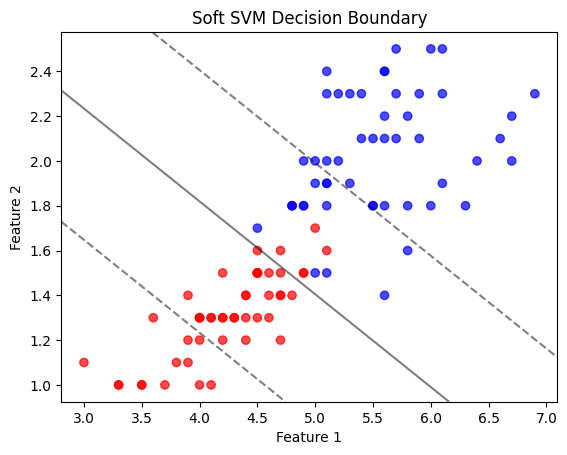

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

class SoftMarginSVM:
    def __init__(self, C=1.0, learning_rate=0.001, epochs=1000):
        self.C = C  # Regularization parameter
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.epochs = epochs  # Number of iterations
        self.w = None  # Weights
        self.b = 0  # Bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)

        # Training process
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.w / n_samples)
                else:
                    self.w -= self.learning_rate * (2 * self.w / n_samples - np.dot(x_i, y[idx]) * self.C)
                    self.b -= self.learning_rate * (-y[idx] * self.C)

    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

    def score(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy
    
    def plot_decision_boundary(self, X, y):
        
        # 데이터 시각화
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

        # 그래프의 한계 설정
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx = np.linspace(xlim[0], xlim[1], 30)
        yy = np.linspace(ylim[0], ylim[1], 30)
        YY, XX = np.meshgrid(yy, xx)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = (np.dot(xy, self.w) + self.b).reshape(XX.shape)

        # Decision boundary 시각화
        ax.contour(XX, YY, Z, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'], colors='k')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Soft SVM Decision Boundary')
        plt.show()


# iris 데이터 준비
iris = datasets.load_iris()
X = iris.data[50:, 2:]
y = iris.target[50:] 

# 데이터에서 y의 값을 1 or -1로 변환
y = np.where(y == 1, 1, -1)

# SVM 모델 생성 및 훈련
model = SoftMarginSVM()
model.fit(X, y)

# 예측 및 정확도 평가
print(y, "\n" ,model.predict(X)) 
print("Model accuracy:", model.score(X, y))

# 시각화
model.plot_decision_boundary(X, y)



Accuracy: 95.00%


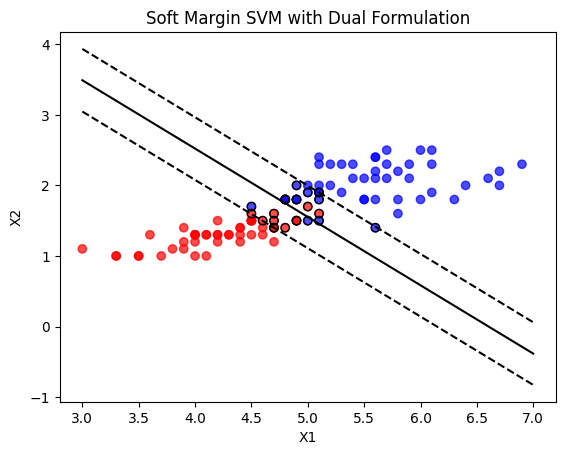

In [106]:
### Dual form of SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


# iris 데이터 준비
iris = datasets.load_iris()
X = iris.data[50:, 2:]
y = iris.target[50:] 

# 데이터에서 y의 값을 1 or -1로 변환
y = np.where(y == 1, 1, -1)

# 유틸리티 함수들
def kernel(x1, x2):
    return np.dot(x1, x2)

def compute_b(X, y, alpha, w):
    support_vectors = np.where((alpha > 1e-4) & (alpha < 1))[0]
    b_values = y[support_vectors] - np.dot(X[support_vectors], w)
    return np.mean(b_values)

def smo(X, y, C, tol=1e-4, max_passes=1000):
    m, n = X.shape
    alpha = np.zeros(m)
    b = 0
    passes = 0

    def L_H(alpha_i, alpha_j, y_i, y_j, C):
        if y_i != y_j:
            return max(0, alpha_j - alpha_i), min(C, C + alpha_j - alpha_i)
        else:
            return max(0, alpha_i + alpha_j - C), min(C, alpha_i + alpha_j)

    while passes < max_passes:
        alpha_changed = 0
        for i in range(m):
            E_i = np.dot((alpha * y).T, kernel(X, X[i])) + b - y[i]
            if (y[i] * E_i < -tol and alpha[i] < C) or (y[i] * E_i > tol and alpha[i] > 0):
                j = np.random.choice([_ for _ in range(m) if _ != i])
                E_j = np.dot((alpha * y).T, kernel(X, X[j])) + b - y[j]
                alpha_i_old, alpha_j_old = alpha[i], alpha[j]
                L, H = L_H(alpha_i_old, alpha_j_old, y[i], y[j], C)
                if L == H:
                    continue
                eta = 2 * kernel(X[i], X[j]) - kernel(X[i], X[i]) - kernel(X[j], X[j])
                if eta >= 0:
                    continue
                alpha[j] -= y[j] * (E_i - E_j) / eta
                alpha[j] = np.clip(alpha[j], L, H)
                if abs(alpha[j] - alpha_j_old) < tol:
                    continue
                alpha[i] += y[i] * y[j] * (alpha_j_old - alpha[j])
                b1 = b - E_i - y[i] * (alpha[i] - alpha_i_old) * kernel(X[i], X[i]) - y[j] * (alpha[j] - alpha_j_old) * kernel(X[i], X[j])
                b2 = b - E_j - y[i] * (alpha[i] - alpha_i_old) * kernel(X[i], X[j]) - y[j] * (alpha[j] - alpha_j_old) * kernel(X[j], X[j])
                if 0 < alpha[i] < C:
                    b = b1
                elif 0 < alpha[j] < C:
                    b = b2
                else:
                    b = (b1 + b2) / 2
                alpha_changed += 1
        if alpha_changed == 0:
            passes += 1
        else:
            passes = 0
    return alpha, b

# SVM 훈련
C = 1.0
alpha, b = smo(X, y, C)
w = np.dot(X.T, alpha * y)

# 결정 경계 함수
def decision_function(X):
    return np.dot(X, w) + b

# 예측 함수
def predict(X):
    return np.sign(decision_function(X))

# 정확도 계산
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# 예측 및 정확도 계산
y_pred = predict(X)
acc = accuracy(y, y_pred)
print(f"Accuracy: {acc * 100:.2f}%")


# 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
support_vectors = np.where(alpha > 1e-4)[0]
plt.scatter(X[support_vectors, 0], X[support_vectors, 1], edgecolors='k', facecolors='none')

# 결정 경계 시각화
x0 = np.linspace(3, 7, 100)
x1 = -(w[0] * x0 + b) / w[1]
x1_margin_positive = -(w[0] * x0 + b - 1) / w[1]
x1_margin_negative = -(w[0] * x0 + b + 1) / w[1]

plt.plot(x0, x1, 'k-')
plt.plot(x0, x1_margin_positive, 'k--')
plt.plot(x0, x1_margin_negative, 'k--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Soft Margin SVM with Dual Formulation')
plt.show()

# Kernel SVM

REPORT3: Apply various kernel filters to SVM and compare their performance. Also, you have to visualize the decision boundaries and support vectors of SVM with different kernel filters. The report should indicate which kernel used in the SVM performed best, including reasons based on visualized data.

Model accuracy: 0.9222222222222223


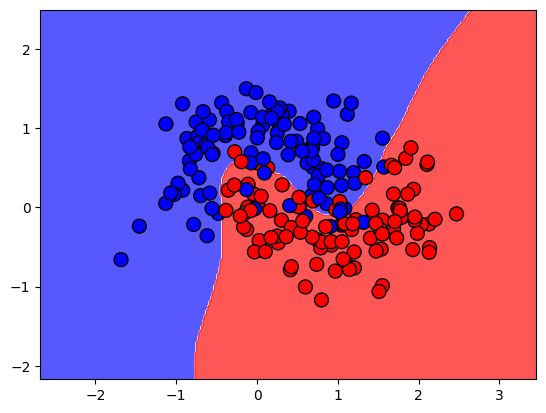

In [44]:
### SVM_kernel

import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from numpy import random


class Kernelmodel:
    def __init__(self, kernel='rbf', sigma=0.2, learning_rate=0.0001, lambda_param=0.01, epochs=1000):
        self.kernel = kernel
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.alpha = None

    def gaussian_kernel(self, x1, x2):
        return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * (self.sigma ** 2)))

    def compute_kernel_matrix(self, X):
        n_samples = X.shape[0]
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.gaussian_kernel(X[i], X[j])
        return K

    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        n_samples, n_features = X.shape
        K = self.compute_kernel_matrix(X)
        self.alpha = np.zeros(n_samples)

        for epoch in range(self.epochs):
            for i in range(n_samples):
                gradient = 1 - Y[i] * np.sum(self.alpha * Y * K[:, i])
                self.alpha[i] += self.learning_rate * (gradient - self.lambda_param * self.alpha[i])
                self.alpha[i] = max(0, self.alpha[i])  # alpha 값은 0 이상이어야 함

    def predict(self, X_test):
        K = np.array([self.gaussian_kernel(x_train, X_test) for x_train in self.X])
        return np.sign(np.sum(self.alpha * self.Y * K))

    def plot_decision_boundary(self):
        x_min, x_max = self.X[:, 0].min() - 1, self.X[:, 0].max() + 1
        y_min, y_max = self.X[:, 1].min() - 1, self.X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
        Z = np.array([self.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bwr)
        plt.scatter(self.X[:, 0], self.X[:, 1], c=self.Y, s=100, edgecolors='k', marker='o', cmap=plt.cm.bwr)
        plt.show()

    def score(self, X_test, Y_test):
        predictions = np.array([self.predict(x) for x in X_test])
        return np.mean(predictions == Y_test)


# Example usage with dummy data
dataset = sklearn.datasets.make_moons(n_samples = 300, noise = 0.3, random_state = 20) # you can change noise and random_state where noise >= 0.15
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset[0], dataset[1], test_size = 0.3, random_state = 100)

y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

# 모델 학습 및 결과 시각화
model = Kernelmodel()
model.fit(X_train, y_train)

print('Model accuracy:', model.score(X_test, y_test))
model.plot_decision_boundary()




# sklearn 라이브러리를 사용한 SVM와 비교해보기

Accuracy: 1.0
Weight (w): [ 6.31777572 -5.26481134]
Bias (b): -17.321241545740804


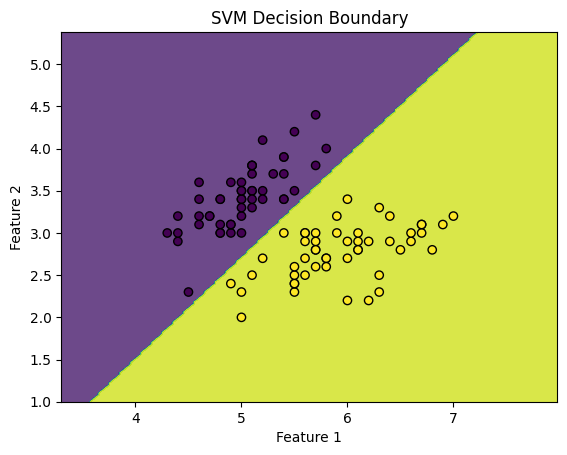

In [70]:
### Hard margin

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 아이리스 데이터 준비
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100] 

# SVM 모델 생성 및 훈련
model = SVC(kernel='linear', C=1e5)  #C값을 매우 크게 설정
model.fit(X, y)

# 예측 및 평가
y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))

# 학습된 weight와 bias 추출
w = model.coef_[0]
b = model.intercept_[0]

print("Weight (w):", w)
print("Bias (b):", b)


# 결정 경계 플롯 함수
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# 결정 경계 시각화 진행
plot_decision_boundaries(X, y, model)

Accuracy: 0.95


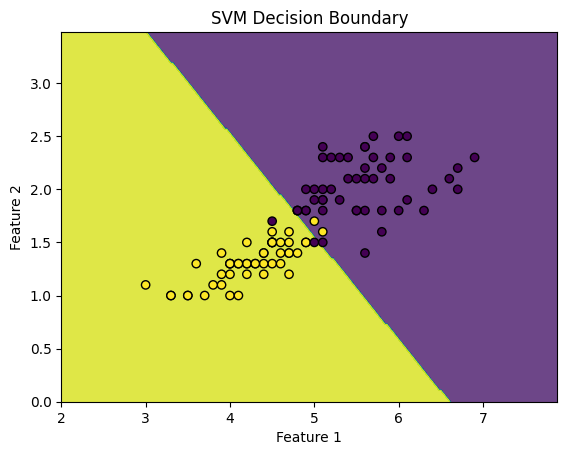

In [8]:
### Soft margin SVM


# iris 데이터 준비
iris = datasets.load_iris()
X = iris.data[50:, 2:]
y = iris.target[50:] 

# 데이터에서 y의 값을 1 or -1로 변환
y = np.where(y == 1, 1, -1)

# SVM 모델 생성 및 훈련
model = SVC(kernel='linear', C=1)  #C값을 1로 하는 Soft margin SVM 구현
model.fit(X, y)

# 예측 및 평가
y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))


# 결정 경계 시각화 진행
plot_decision_boundaries(X, y, model)

Accuracy: 0.9222222222222223


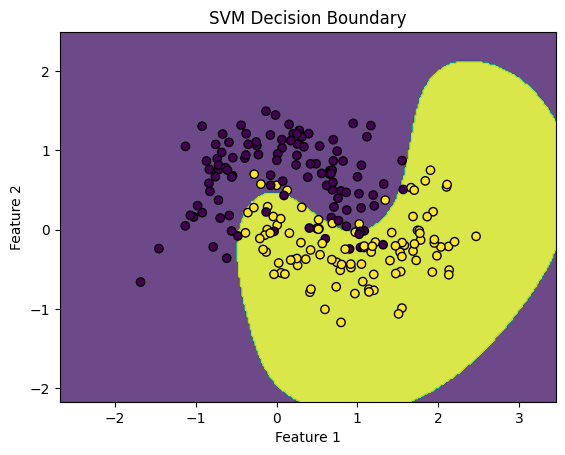

In [49]:
### Kernel SVM 


# Example usage with dummy data
dataset = sklearn.datasets.make_moons(n_samples = 300, noise = 0.3, random_state = 20) # you can change noise and random_state where noise >= 0.15
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset[0], dataset[1], test_size = 0.3, random_state = 100)


# SVM 모델 생성 및 훈련
model = SVC(kernel='rbf', gamma=1)  # 선형 커널 사용 (다항식 커널: poly, 가우시안 RBF 커널: rbf)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# 결정 경계 플롯 함수
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# 결정 경계 시각화 진행
plot_decision_boundaries(X_train, y_train, model)

Accuracy: 0.8555555555555555


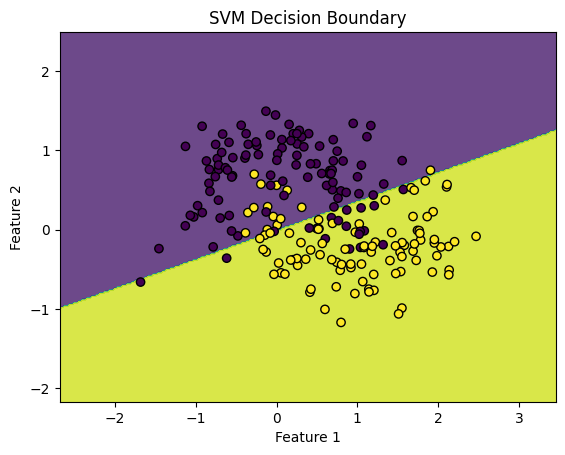

In [50]:
### Kernel SVM 


# Example usage with dummy data
dataset = sklearn.datasets.make_moons(n_samples = 300, noise = 0.3, random_state = 20) # you can change noise and random_state where noise >= 0.15
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset[0], dataset[1], test_size = 0.3, random_state = 100)


# SVM 모델 생성 및 훈련
model = SVC(kernel='linear', C=1)  # 선형 커널 사용 (다항식 커널: poly, 가우시안 RBF 커널: rbf)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# 결정 경계 플롯 함수
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# 결정 경계 시각화 진행
plot_decision_boundaries(X_train, y_train, model)

Accuracy: 0.8555555555555555


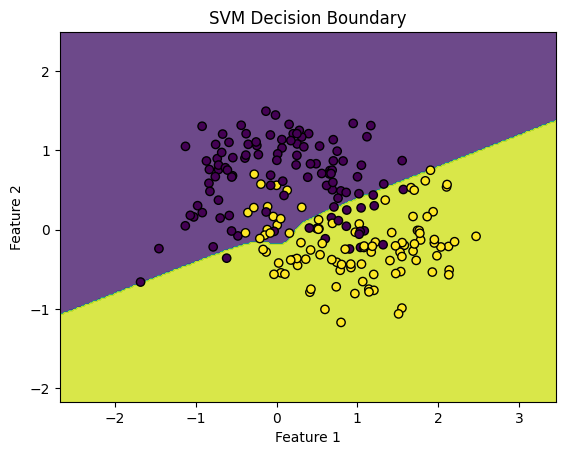

In [58]:
### Kernel SVM 


# Example usage with dummy data
dataset = sklearn.datasets.make_moons(n_samples = 300, noise = 0.3, random_state = 20) # you can change noise and random_state where noise >= 0.15
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset[0], dataset[1], test_size = 0.3, random_state = 100)


# SVM 모델 생성 및 훈련
model = SVC(kernel='poly', C=1, degree=3)  # 선형 커널 사용 (다항식 커널: poly, 가우시안 RBF 커널: rbf)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# 결정 경계 플롯 함수
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# 결정 경계 시각화 진행
plot_decision_boundaries(X_train, y_train, model)

# Extra

Perceptron classification accuracy 0.7111111111111111
[1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1]
[0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]


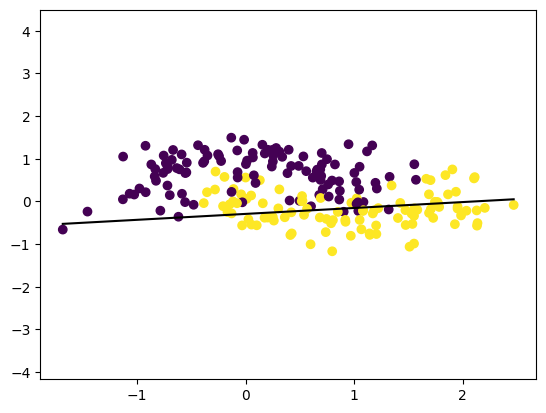

In [10]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

class Perceptron:

    def __init__(self, learning_rate=0.0001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = np.where(y > 0 , 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted


# Testing
if __name__ == "__main__":

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    # Example usage with dummy data
    dataset = sklearn.datasets.make_moons(n_samples = 300, noise = 0.3, random_state = 20) # you can change noise and random_state where noise >= 0.15
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dataset[0], dataset[1], test_size = 0.3, random_state = 100)

    p = Perceptron()
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    print(y_test)
    print(predictions)
    plt.show()